# Clustering Analysis
This notebook involves performing analysis on the clusters obtained from mclust and kamila in R

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import seaborn as sns

## Directory

In [ ]:
if os.getcwd().split('/')[-1] == 'nbs':
    os.chdir('../')

In [ ]:
os.listdir()

['README.md',
 'MANIFEST.in',
 '_proc',
 '.github',
 'LICENSE',
 'reports',
 'kidney_transplant_prediction',
 'nbs',
 '.git',
 'env',
 'docs',
 'setup.py',
 '.ipynb_checkpoints',
 'data',
 '.gitignore',
 'r',
 'settings.ini']

## Data

In [ ]:
df_pheno = pd.read_pickle('data/proc/pheno_cluster.pkl')

## Cluster Differences

In [ ]:
df_pheno.head()

,DonAge,RecAge,DonSex,RecSex,SexMismatch,Year,IntracranialHaemorrhage,RecPC1,RecHypertensionPRS,DonHypertensionPRS,DoneGFRPRS,DonStrokePRS,RecHAKVPRS,ColdIschemiaTime,GraftNo,eGFR1Year,eGFR5Year,GraftSurvivalDays,MClustClusters,KamilaClusters
0,25.0,54.0,Female,Female,True,2000.0,False,-0.001810,0.574557,0.041781,-0.068460,-2.471242,-0.329893,1080.0,1.0,37.016586,45.097434,3571.0,3,4
1,37.0,35.0,Male,Male,True,2001.0,False,-0.009447,-0.374240,0.829304,0.975353,0.069456,0.439058,1110.0,1.0,75.068169,65.872676,3642.0,3,1
2,22.0,53.0,Female,Female,True,2002.0,False,-0.006079,0.050664,0.204120,-0.613161,-0.701665,0.004753,1102.0,1.0,59.602940,18.065248,3206.0,3,4
3,48.0,33.0,Female,Male,False,2002.0,True,-0.005711,-0.178995,0.322234,-0.446593,-0.399453,-1.000807,740.0,1.0,50.073505,NaN,962.0,1,3
4,39.0,61.0,Male,Male,True,1999.0,False,-0.010986,-0.090834,-0.195021,1.232662,1.297929,-1.184922,1072.0,1.0,43.704456,NaN,1038.0,3,5


In [ ]:
df_pheno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   DonAge                   1878 non-null   float64 
 1   RecAge                   1878 non-null   float64 
 2   DonSex                   1878 non-null   category
 3   RecSex                   1878 non-null   category
 4   SexMismatch              1878 non-null   bool    
 5   Year                     1878 non-null   float64 
 6   IntracranialHaemorrhage  1878 non-null   bool    
 7   RecPC1                   1878 non-null   float64 
 8   RecHypertensionPRS       1878 non-null   float64 
 9   DonHypertensionPRS       1878 non-null   float64 
 10  DoneGFRPRS               1878 non-null   float64 
 11  DonStrokePRS             1878 non-null   float64 
 12  RecHAKVPRS               1878 non-null   float64 
 13  ColdIschemiaTime         1878 non-null   float64 
 14  GraftNo 

In [ ]:
df_pheno['RecSex_num'] = df_pheno.RecSex.cat.codes
df_pheno['DonSex_num'] = df_pheno.DonSex.cat.codes

In [ ]:
df_pheno.columns

Index(['DonAge', 'RecAge', 'DonSex', 'RecSex', 'SexMismatch', 'Year',
       'IntracranialHaemorrhage', 'RecPC1', 'RecHypertensionPRS',
       'DonHypertensionPRS', 'DoneGFRPRS', 'DonStrokePRS', 'RecHAKVPRS',
       'ColdIschemiaTime', 'GraftNo', 'eGFR1Year', 'eGFR5Year',
       'GraftSurvivalDays', 'MClustClusters', 'KamilaClusters', 'RecSex_num',
       'DonSex_num'],
      dtype='object')

In [ ]:
features = [
    'DonAge', 'RecAge', 'SexMismatch', 'Year',
    'IntracranialHaemorrhage', 'RecPC1', 'RecHypertensionPRS',
    'DonHypertensionPRS', 'DoneGFRPRS', 'DonStrokePRS', 'RecHAKVPRS',
    'ColdIschemiaTime', 'GraftNo', 'GraftSurvivalDays',
    'RecSex_num', 'DonSex_num'
]

In [ ]:
calinski_harabasz_score(df_pheno[features], df_pheno.KamilaClusters)

21.571087565147195

In [ ]:
calinski_harabasz_score(df_pheno[features], df_pheno.MClustClusters)

47.48194925084955

In [ ]:
silhouette_score(df_pheno[features], df_pheno.KamilaClusters)

-0.09442655100574597

In [ ]:
silhouette_score(df_pheno[features], df_pheno.MClustClusters)

0.028508939667000518

In [ ]:
def CI(x):
    """
    Calculate 95% confidence interval for the mean of a pandas series.
    
    Args:
    x (pandas.Series): a pandas series
    
    Returns:
    tuple: the bottom and top of the confidence interval
    
    """
    n = len(x)
    mean = np.mean(x)
    stderr = stats.sem(x)
    interval = stats.t.interval(0.95, n - 1, mean, stderr)
    r = 4 if x.name == 'RecPC1' else 3
    return round(interval[0],r), round(interval[1], r)

CI(df_pheno.RecPC1)

(0.0011, 0.0022)

In [ ]:
def CI_plus_minus(x):
    """
    Calculate 95% confidence interval for the mean of a pandas series.
    
    Args:
    x (pandas.Series): a pandas series
    
    Returns:
    tuple: the bottom and top of the confidence interval
    
    """
    n = len(x)
    mean = np.mean(x)
    stderr = stats.sem(x)
    interval = stats.t.interval(0.95, n - 1, mean, stderr)
    r = 4 if x.name == 'RecPC1' else 3
    return str(round(interval[0],r)) + ' +/- ' + str(round(interval[1] - interval[0], r))

CI_plus_minus(df_pheno.DonAge)

'42.464 +/- 1.386'

In [ ]:
mclust = df_pheno.drop(
    ['DonSex', 'RecSex', 'eGFR5Year', 'KamilaClusters', 
     'DonSex_num', 'RecSex_num', 'SexMismatch', 'IntracranialHaemorrhage'], axis=1
).dropna(how='any').groupby('MClustClusters').agg(CI).transpose()

In [ ]:
df_kamila = df_pheno.drop(
    ['DonSex', 'RecSex', 'eGFR5Year', 'MClustClusters', 
     'DonSex_num', 'RecSex_num', 'SexMismatch', 'IntracranialHaemorrhage'], axis=1
).dropna(how='any').groupby('KamilaClusters').agg(CI).transpose()

In [ ]:
def column_name(x):
    return f"""(N = {df_pheno.drop(['DonSex', 'RecSex', 'eGFR5Year', 'MClustClusters',
                    'DonSex_num', 'RecSex_num', 'SexMismatch', 'IntracranialHaemorrhage'], axis=1
).dropna(how='any').KamilaClusters.value_counts()[x]}) {x}"""

In [ ]:
column_names = {x:column_name(x) for x in df_kamila.columns}

In [ ]:
df_kamila.rename(column_names, axis=1, inplace=True)
df_kamila.columns.name = 'Cluster No.'

In [ ]:
df_kamila

Cluster No.,(N = 250) 1,(N = 362) 2,(N = 418) 3,(N = 197) 4,(N = 386) 5
DonAge,"(23.786, 25.774)","(59.674, 60.845)","(49.634, 51.05)","(20.099, 21.881)","(43.381, 44.469)"
RecAge,"(29.8, 31.384)","(57.217, 58.805)","(34.443, 35.743)","(50.683, 52.728)","(53.644, 55.169)"
Year,"(1999.202, 2000.39)","(2001.273, 2002.042)","(2000.507, 2001.311)","(1998.888, 2000.371)","(2000.798, 2001.575)"
RecPC1,"(0.0027, 0.0058)","(-0.0022, -0.0001)","(-0.0007, 0.0014)","(0.0021, 0.0056)","(0.0007, 0.0029)"
RecHypertensionPRS,"(-0.15, 0.088)","(-0.15, 0.045)","(-0.129, 0.065)","(-0.193, 0.072)","(-0.172, 0.023)"
DonHypertensionPRS,"(-0.253, 0.002)","(0.071, 0.287)","(0.12, 0.314)","(-0.35, -0.067)","(0.113, 0.314)"
DoneGFRPRS,"(0.018, 0.239)","(-0.148, 0.062)","(-0.047, 0.133)","(-0.115, 0.169)","(-0.025, 0.177)"
DonStrokePRS,"(-0.007, 0.246)","(-0.016, 0.176)","(-0.033, 0.159)","(-0.1, 0.197)","(-0.038, 0.164)"
RecHAKVPRS,"(-0.123, 0.127)","(-0.131, 0.071)","(-0.06, 0.129)","(-0.042, 0.225)","(-0.144, 0.05)"
ColdIschemiaTime,"(1117.229, 1217.811)","(1088.954, 1163.09)","(1117.711, 1184.007)","(1104.039, 1220.672)","(1129.567, 1207.096)"


In [ ]:
df_kamila.to_latex()

/tmp/slurm-tmp.3480340/ipykernel_249184/3957774311.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_kamila.to_latex()


'\\begin{tabular}{llllll}\n\\toprule\nCluster No. &         (N = 294) 1 &         (N = 400) 2 &         (N = 494) 3 &         (N = 244) 4 &         (N = 446) 5 \\\\\n\\midrule\nDonAge             &      (23.79, 25.77) &      (59.67, 60.85) &      (49.63, 51.05) &       (20.1, 21.88) &      (43.38, 44.47) \\\\\nRecAge             &       (29.8, 31.38) &       (57.22, 58.8) &      (34.44, 35.74) &      (50.68, 52.73) &      (53.64, 55.17) \\\\\nYear               &   (1999.2, 2000.39) &  (2001.27, 2002.04) &  (2000.51, 2001.31) &  (1998.89, 2000.37) &   (2000.8, 2001.57) \\\\\nRecPC1             &    (0.0027, 0.0058) &  (-0.0022, -0.0001) &   (-0.0007, 0.0014) &    (0.0021, 0.0056) &    (0.0007, 0.0029) \\\\\nRecHypertensionPRS &       (-0.15, 0.09) &       (-0.15, 0.04) &       (-0.13, 0.07) &       (-0.19, 0.07) &       (-0.17, 0.02) \\\\\nDonHypertensionPRS &        (-0.25, 0.0) &        (0.07, 0.29) &        (0.12, 0.31) &      (-0.35, -0.07) &        (0.11, 0.31) \\\\\nDoneGFRPRS   

In [ ]:
df_pheno_tsne = df_pheno.dropna(subset='eGFR1Year').drop(
    [
        'DonSex', 'RecSex', 'eGFR5Year', 'GraftSurvivalDays'
    ], axis=1
)

In [ ]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_pheno_tsne.drop('eGFR1Year', axis=1).values)

df_pheno_tsne['PCA1'] = pca_result[:,0]
df_pheno_tsne['PCA2'] = pca_result[:,1] 
df_pheno_tsne['PCA3'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.96948169e-01 1.87941628e-03 9.90122690e-04]


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

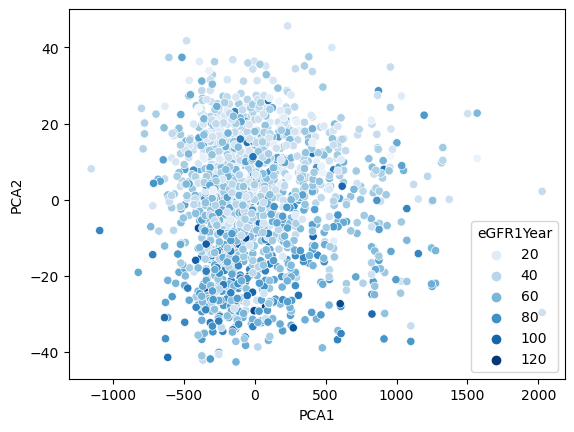

In [ ]:
sns.scatterplot(data=df_pheno_tsne, x='PCA1', y='PCA2', hue='eGFR1Year', palette='Blues')

<AxesSubplot:xlabel='PCA1', ylabel='eGFR1Year'>

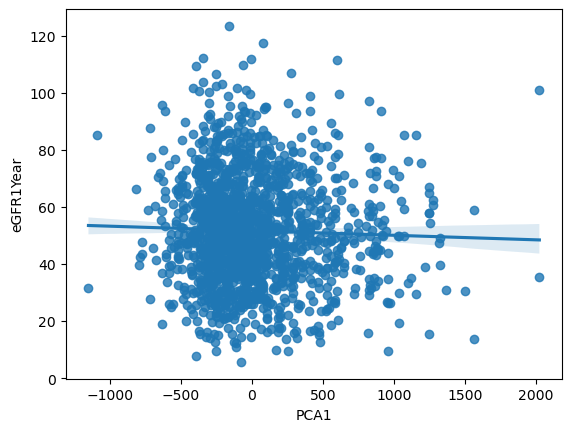

In [ ]:
sns.regplot(data=df_pheno_tsne, x='PCA1', y='eGFR1Year')

<AxesSubplot:xlabel='PCA2', ylabel='eGFR1Year'>

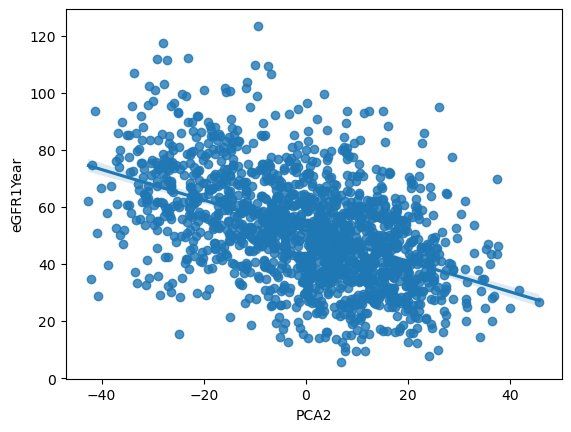

In [ ]:
sns.regplot(data=df_pheno_tsne, x='PCA2', y='eGFR1Year')

In [ ]:
df_pheno_tsne.select_dtypes(include=[np.number])

,DonAge,RecAge,Year,RecPC1,RecHypertensionPRS,DonHypertensionPRS,DoneGFRPRS,DonStrokePRS,RecHAKVPRS,ColdIschemiaTime,GraftNo,eGFR1Year,RecSex_num,DonSex_num,tSNE1,tSNE2
0,25.0,54.0,2000.0,-0.001810,0.574557,0.041781,-0.068460,-2.471242,-0.329893,1080.0,1.0,37.016586,1,1,26.117392,8.227694
1,37.0,35.0,2001.0,-0.009447,-0.374240,0.829304,0.975353,0.069456,0.439058,1110.0,1.0,75.068169,0,0,39.732681,1.175459
2,22.0,53.0,2002.0,-0.006079,0.050664,0.204120,-0.613161,-0.701665,0.004753,1102.0,1.0,59.602940,1,1,29.415976,5.786309
3,48.0,33.0,2002.0,-0.005711,-0.178995,0.322234,-0.446593,-0.399453,-1.000807,740.0,1.0,50.073505,0,1,-7.476435,43.015972
4,39.0,61.0,1999.0,-0.010986,-0.090834,-0.195021,1.232662,1.297929,-1.184922,1072.0,1.0,43.704456,0,0,23.304220,11.509708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,34.0,58.0,2002.0,-0.012529,-2.908043,0.494708,1.577965,-1.093869,-0.226770,1380.0,1.0,75.340203,0,0,0.814851,-51.155285
1874,71.0,64.0,2003.0,0.003332,0.053995,-0.712784,-0.209608,0.109274,0.504381,1235.0,1.0,53.683675,1,0,32.918530,-30.452812
1875,64.0,47.0,1996.0,0.006572,-0.005663,-0.779348,-1.897219,-1.563509,2.973903,571.0,1.0,36.878767,0,0,-4.994414,-21.967161
1876,42.0,52.0,1993.0,0.020830,0.421014,-1.077967,0.575994,-0.336116,-2.335771,1260.0,1.0,55.043630,0,0,26.894663,-35.982273


In [ ]:
numeric = df_pheno_tsne.select_dtypes(include=[np.number]).drop('eGFR1Year', axis=1).columns

In [ ]:
numeric

Index(['DonAge', 'RecAge', 'Year', 'RecPC1', 'RecHypertensionPRS',
       'DonHypertensionPRS', 'DoneGFRPRS', 'DonStrokePRS', 'RecHAKVPRS',
       'ColdIschemiaTime', 'GraftNo', 'RecSex_num', 'DonSex_num'],
      dtype='object')

In [ ]:

for perplexity in range(5,51,5):
    time_start = time.time()
    tsne = TSNE(learning_rate=50, n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    df_pheno_tsne[
        [
            'Perp' + str(perplexity) + 'Comp1', 
            'Perp' + str(perplexity) + 'Comp2'
        ]
    ] = pd.DataFrame(tsne.fit_transform(df_pheno_tsne[numeric]))
    time_end = time.time()
    duration = time_end - time_start
    print(f't-SNE done! Time elapsed at Perplexity {perplexity}: {duration} seconds')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1613 samples in 0.002s...
[t-SNE] Computed neighbors for 1613 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1613
[t-SNE] Computed conditional probabilities for sample 1613 / 1613
[t-SNE] Mean sigma: 5.747876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.046448
[t-SNE] KL divergence after 300 iterations: 1.993535
t-SNE done! Time elapsed at Perplexity 5: 2.7068042755126953 seconds
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1613 samples in 0.002s...
[t-SNE] Computed neighbors for 1613 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1613
[t-SNE] Computed conditional probabilities for sample 1613 / 1613
[t-SNE] Mean sigma: 7.280118
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.489326
[t-SNE] KL divergence after 300 iterations: 1.607860
t-SNE done! Time elapsed at Perplexity 10: 2.5715417861938477 sec

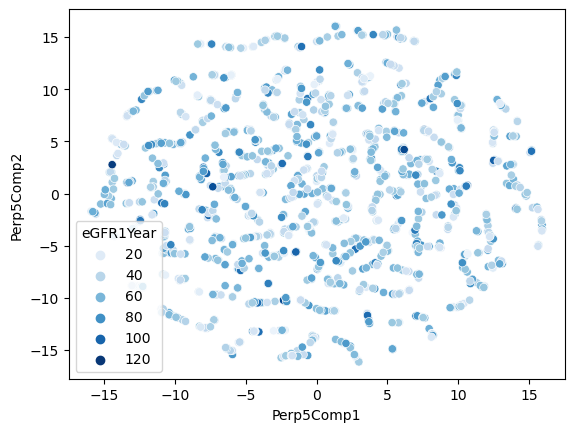

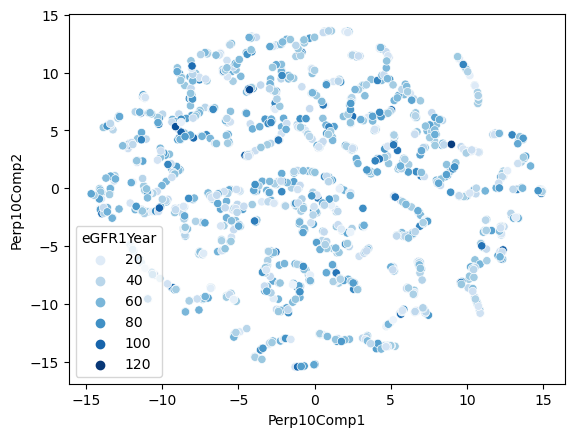

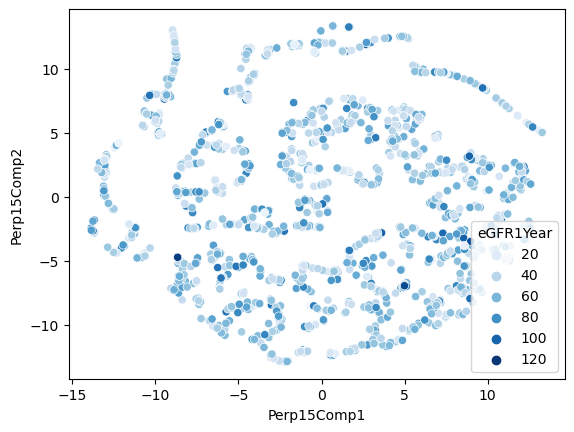

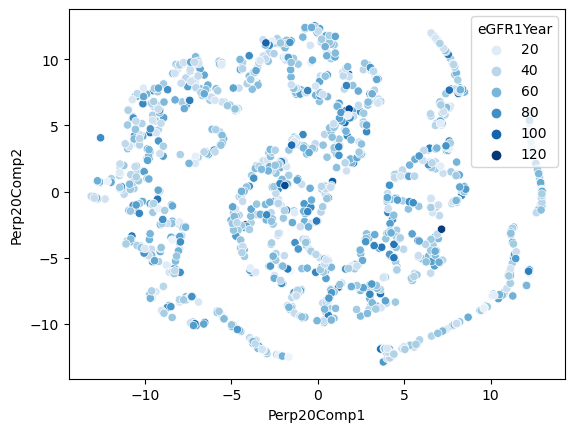

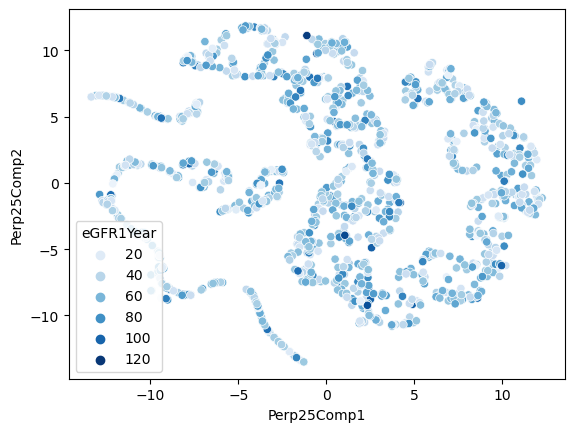

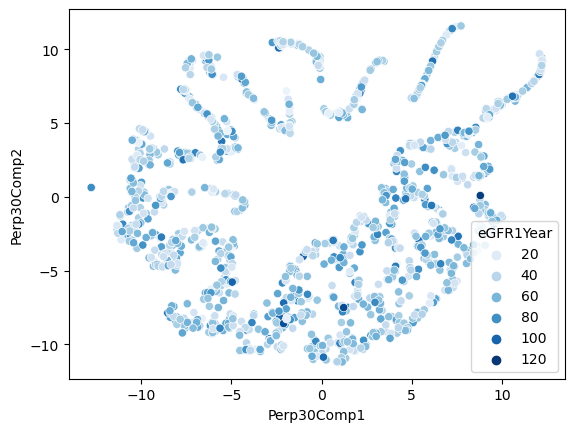

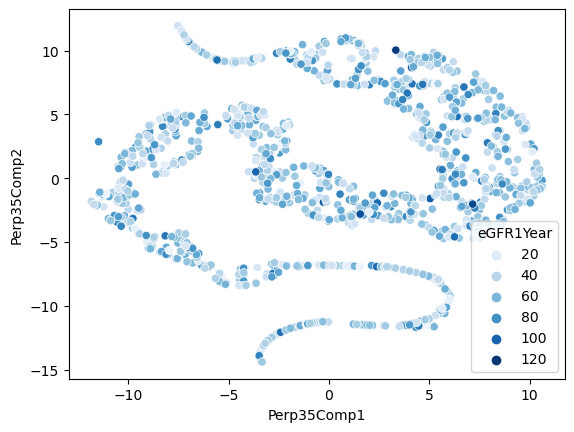

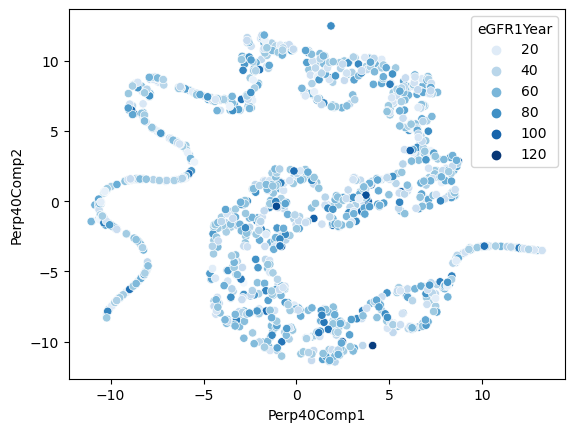

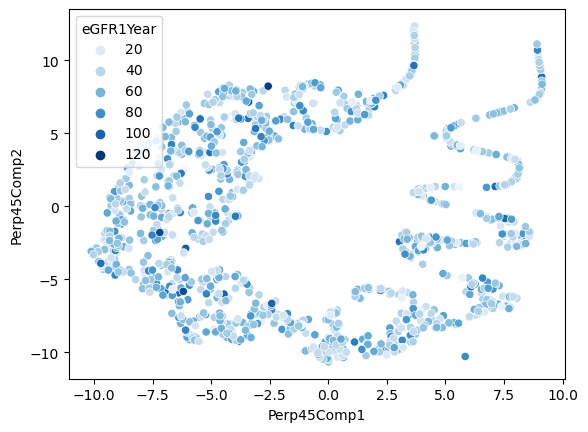

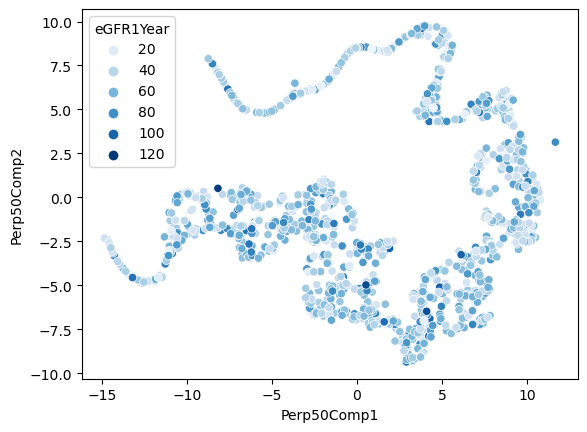

In [ ]:
for perplexity in range(5,51,5):
    fig, ax = plt.subplots(1)
    sns.scatterplot(data=df_pheno_tsne, x=f'Perp{perplexity}Comp1', y=f'Perp{perplexity}Comp2', 
                    hue='eGFR1Year', palette='Blues')